In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
data_complete = pd.merge(mouse_drug_data, clinical_trial_data, how="left", on=["Mouse ID"])

# Display the data table for preview
data_complete.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grp_data_complete = data_complete.groupby(["Drug", "Timepoint"])
mean_Tumor_Volume = grp_data_complete["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
mean_Tumor_Volume_df = pd.DataFrame(mean_Tumor_Volume)

# Convert index to columns
mean_Tumor_Volume_df.reset_index(level=1, inplace=True)
mean_Tumor_Volume_df.reset_index(level=0, inplace=True)

# Preview DataFrame
mean_Tumor_Volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stderr_Tumor_Volume = grp_data_complete["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
stderr_Tumor_Volume_df = pd.DataFrame(stderr_Tumor_Volume)

# Convert index to columns
stderr_Tumor_Volume_df.reset_index(level=1, inplace=True)
stderr_Tumor_Volume_df.reset_index(level=0, inplace=True)

# Preview DataFrame
stderr_Tumor_Volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
mean_Tumor_Volume_pivotdf = mean_Tumor_Volume_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')
stderr_Tumor_Volume_pivotdf = stderr_Tumor_Volume_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')

# Preview that Reformatting worked
mean_Tumor_Volume_pivotdf.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
# Preview that Reformatting worked
stderr_Tumor_Volume_pivotdf.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


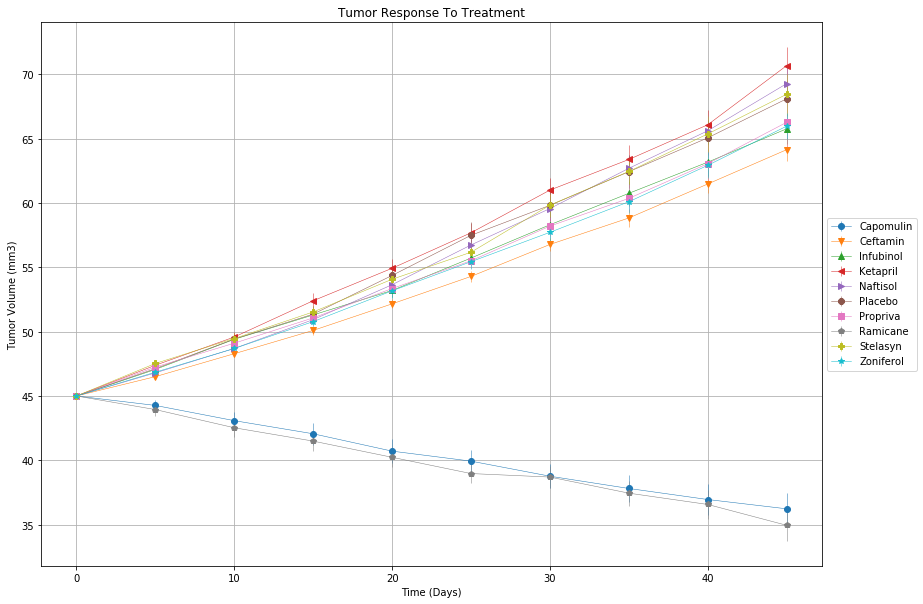

In [22]:
# Generate the Plot (with Error Bars)
plt.errorbar(mean_Tumor_Volume_pivotdf.index,
             mean_Tumor_Volume_pivotdf["Capomulin"],
             yerr=stderr_Tumor_Volume_pivotdf["Capomulin"],
             marker="o",
             linewidth=0.5
            )
plt.errorbar(mean_Tumor_Volume_pivotdf.index,
             mean_Tumor_Volume_pivotdf["Ceftamin"],
             yerr=stderr_Tumor_Volume_pivotdf["Ceftamin"],
             marker="v",
             linewidth=0.5
            )
plt.errorbar(mean_Tumor_Volume_pivotdf.index,
             mean_Tumor_Volume_pivotdf["Infubinol"],
             yerr=stderr_Tumor_Volume_pivotdf["Infubinol"],
             marker="^",
             linewidth=0.5
            )
plt.errorbar(mean_Tumor_Volume_pivotdf.index,
             mean_Tumor_Volume_pivotdf["Ketapril"],
             yerr=stderr_Tumor_Volume_pivotdf["Ketapril"],
             marker="<",             
             linewidth=0.5
            )
plt.errorbar(mean_Tumor_Volume_pivotdf.index,
             mean_Tumor_Volume_pivotdf["Naftisol"],
             yerr=stderr_Tumor_Volume_pivotdf["Naftisol"],
             marker=">",             
             linewidth=0.5
            )
plt.errorbar(mean_Tumor_Volume_pivotdf.index,
             mean_Tumor_Volume_pivotdf["Placebo"],
             yerr=stderr_Tumor_Volume_pivotdf["Placebo"],
             marker="8",            
             linewidth=0.5
            )
plt.errorbar(mean_Tumor_Volume_pivotdf.index,
             mean_Tumor_Volume_pivotdf["Propriva"],
             yerr=stderr_Tumor_Volume_pivotdf["Propriva"],
             marker="s",             
             linewidth=0.5
            )
plt.errorbar(mean_Tumor_Volume_pivotdf.index,
             mean_Tumor_Volume_pivotdf["Ramicane"],
             yerr=stderr_Tumor_Volume_pivotdf["Ramicane"],
             marker="p",             
             linewidth=0.5
            )
plt.errorbar(mean_Tumor_Volume_pivotdf.index,
             mean_Tumor_Volume_pivotdf["Stelasyn"],
             yerr=stderr_Tumor_Volume_pivotdf["Stelasyn"],
             marker="P",             
             linewidth=0.5
            )
plt.errorbar(mean_Tumor_Volume_pivotdf.index,
             mean_Tumor_Volume_pivotdf["Zoniferol"],
             yerr=stderr_Tumor_Volume_pivotdf["Zoniferol"],
             marker="*",             
             linewidth=0.5
            )

plt.title("Tumor Response To Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.gcf().set_size_inches(14, 10)

# Save the Figure
plt.savefig("output/Tumor Response To Treatment.png")

In [7]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_Metastatic_Sites = grp_data_complete["Metastatic Sites"].mean()

# Convert to DataFrame
mean_Metastatic_Sites_df = pd.DataFrame(mean_Metastatic_Sites)

# Preview DataFrame
mean_Metastatic_Sites_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
stderr_Metastatic_Sites = grp_data_complete["Metastatic Sites"].sem()

# Convert to DataFrame
stderr_Metastatic_Sites_df = pd.DataFrame(stderr_Metastatic_Sites)

# Preview DataFrame
stderr_Metastatic_Sites_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
# Minor Data Munging to Re-Format the Data Frames
    # Convert index to columns
mean_Metastatic_Sites_df.reset_index(level=1, inplace=True)
mean_Metastatic_Sites_df.reset_index(level=0, inplace=True)
stderr_Metastatic_Sites_df.reset_index(level=1, inplace=True)
stderr_Metastatic_Sites_df.reset_index(level=0, inplace=True)

    # Pivot data
mean_Metastatic_Sites_pivotdf = mean_Metastatic_Sites_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')
stderr_Metastatic_Sites_pivotdf = stderr_Metastatic_Sites_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')

In [11]:
# Preview that Reformatting worked
mean_Metastatic_Sites_pivotdf.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [12]:
# Preview that Reformatting worked
stderr_Metastatic_Sites_pivotdf.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


[]

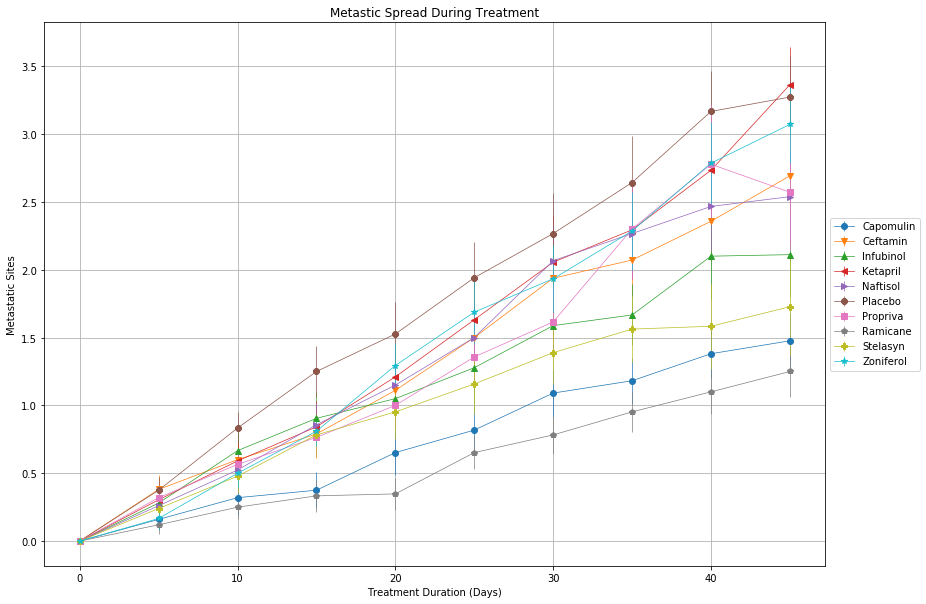

In [24]:
# Generate the Plot (with Error Bars)
plt.errorbar(mean_Metastatic_Sites_pivotdf.index,
             mean_Metastatic_Sites_pivotdf["Capomulin"],
             yerr=stderr_Metastatic_Sites_pivotdf["Capomulin"],
             marker="o",             
             linewidth=0.7
            )
plt.errorbar(mean_Metastatic_Sites_pivotdf.index,
             mean_Metastatic_Sites_pivotdf["Ceftamin"],
             yerr=stderr_Metastatic_Sites_pivotdf["Ceftamin"],
             marker="v",             
             linewidth=0.7
            )
plt.errorbar(mean_Metastatic_Sites_pivotdf.index,
             mean_Metastatic_Sites_pivotdf["Infubinol"],
             yerr=stderr_Metastatic_Sites_pivotdf["Infubinol"],
             marker="^",             
             linewidth=0.7
            )
plt.errorbar(mean_Metastatic_Sites_pivotdf.index,
             mean_Metastatic_Sites_pivotdf["Ketapril"],
             yerr=stderr_Metastatic_Sites_pivotdf["Ketapril"],
             marker="<",             
             linewidth=0.7
            )
plt.errorbar(mean_Metastatic_Sites_pivotdf.index,
             mean_Metastatic_Sites_pivotdf["Naftisol"],
             yerr=stderr_Metastatic_Sites_pivotdf["Naftisol"],
             marker=">",             
             linewidth=0.7
            )
plt.errorbar(mean_Metastatic_Sites_pivotdf.index,
             mean_Metastatic_Sites_pivotdf["Placebo"],
             yerr=stderr_Metastatic_Sites_pivotdf["Placebo"],
             marker="8",             
             linewidth=0.7
            )
plt.errorbar(mean_Metastatic_Sites_pivotdf.index,
             mean_Metastatic_Sites_pivotdf["Propriva"],
             yerr=stderr_Metastatic_Sites_pivotdf["Propriva"],
             marker="s",             
             linewidth=0.7
            )
plt.errorbar(mean_Metastatic_Sites_pivotdf.index,
             mean_Metastatic_Sites_pivotdf["Ramicane"],
             yerr=stderr_Metastatic_Sites_pivotdf["Ramicane"],
             marker="p",             
             linewidth=0.7
            )
plt.errorbar(mean_Metastatic_Sites_pivotdf.index,
             mean_Metastatic_Sites_pivotdf["Stelasyn"],
             yerr=stderr_Metastatic_Sites_pivotdf["Stelasyn"],
             marker="P",             
             linewidth=0.7
            )
plt.errorbar(mean_Metastatic_Sites_pivotdf.index,
             mean_Metastatic_Sites_pivotdf["Zoniferol"],
             yerr=stderr_Metastatic_Sites_pivotdf["Zoniferol"],
             marker="*",             
             linewidth=0.7
            )

plt.title("Metastic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")

plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.gcf().set_size_inches(14, 10)

# Save the Figure
plt.savefig("output/Metastic Spread During Treatment.png")

# Show the Figure
plt.plot()

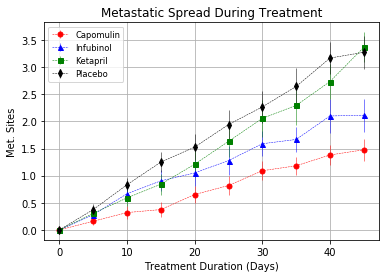

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_Mice = grp_data_complete["Mouse ID"].count()

# Convert to DataFrame
count_Mice_df = pd.DataFrame(count_Mice)

# Convert index to columns & rename Mouse ID column
count_Mice_df.reset_index(level=1, inplace=True)
count_Mice_df.reset_index(level=0, inplace=True)
count_Mice_df = count_Mice_df.rename(columns = {"Mouse ID" : "Mouse Count"})

# Preview DataFrame
count_Mice_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
# Minor Data Munging to Re-Format the Data Frames
count_Mice_pivotdf = count_Mice_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Mouse Count')

# Preview the Data Frame
count_Mice_pivotdf.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


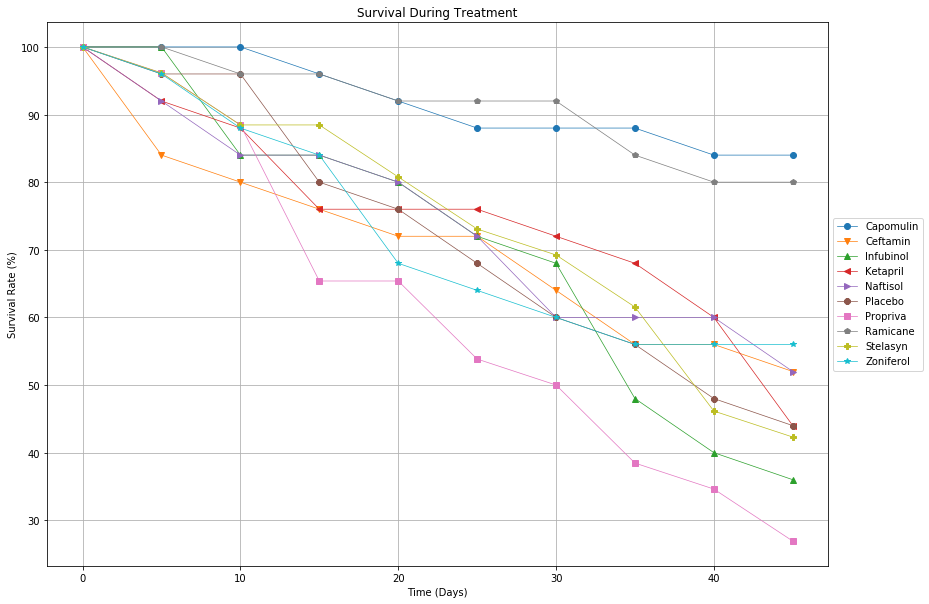

In [21]:
# Generate the Plot (Accounting for percentages)
plt.plot(count_Mice_pivotdf.index,
         count_Mice_pivotdf["Capomulin"] * 100 / count_Mice_pivotdf["Capomulin"].max(),
         marker="o",
         linewidth=0.7
        )
plt.plot(count_Mice_pivotdf.index,
         count_Mice_pivotdf["Ceftamin"] * 100 / count_Mice_pivotdf["Ceftamin"].max(),
         marker="v",
         linewidth=0.7
        )
plt.plot(count_Mice_pivotdf.index,
         count_Mice_pivotdf["Infubinol"] * 100 / count_Mice_pivotdf["Infubinol"].max(),
         marker="^",
         linewidth=0.7
        )
plt.plot(count_Mice_pivotdf.index,
         count_Mice_pivotdf["Ketapril"] * 100 / count_Mice_pivotdf["Ketapril"].max(),
         marker="<",
         linewidth=0.7
        )
plt.plot(count_Mice_pivotdf.index,
         count_Mice_pivotdf["Naftisol"] * 100 / count_Mice_pivotdf["Naftisol"].max(),
         marker=">",
         linewidth=0.7
        )
plt.plot(count_Mice_pivotdf.index,
         count_Mice_pivotdf["Placebo"] * 100 / count_Mice_pivotdf["Placebo"].max(),
         marker="8",
         linewidth=0.7
        )
plt.plot(count_Mice_pivotdf.index,
         count_Mice_pivotdf["Propriva"] * 100 / count_Mice_pivotdf["Propriva"].max(),
         marker="s",
         linewidth=0.7
        )
plt.plot(count_Mice_pivotdf.index,
         count_Mice_pivotdf["Ramicane"] * 100 / count_Mice_pivotdf["Ramicane"].max(),
         marker="p",
         linewidth=0.7
        )
plt.plot(count_Mice_pivotdf.index,
         count_Mice_pivotdf["Stelasyn"] * 100 / count_Mice_pivotdf["Stelasyn"].max(),
         marker="P",
         linewidth=0.7
        )
plt.plot(count_Mice_pivotdf.index,
         count_Mice_pivotdf["Zoniferol"] * 100 / count_Mice_pivotdf["Zoniferol"].max(),
         marker="*",
         linewidth=0.7
        )

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.gcf().set_size_inches(14, 10)

# Save the Figure
plt.savefig("output/Survival During Treatment.png")

# Show the Figure
plt.show()

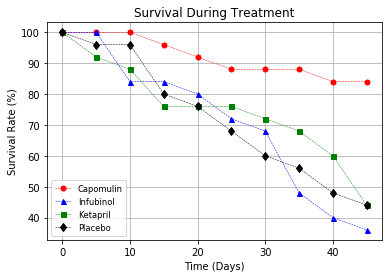

## Summary Bar Graph

In [60]:
# Calculate the percent changes for each drug
drugs = list(mean_Tumor_Volume_pivotdf.columns.values)

firstIndex = mean_Tumor_Volume_pivotdf.index[0] 
lastIndex = mean_Tumor_Volume_pivotdf.index[-1]
pctChanges = []

for drug in drugs:
    pctChange = (mean_Tumor_Volume_pivotdf[drug][lastIndex] - mean_Tumor_Volume_pivotdf[drug][firstIndex]) * 100 / mean_Tumor_Volume_pivotdf[drug][firstIndex]
    pctChanges.append(pctChange)

pctChange_df = pd.DataFrame({"Drug" : drugs,
                             "Percent Change" : pctChanges
                            })    
    
pctChange_df



,Drug,Percent Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

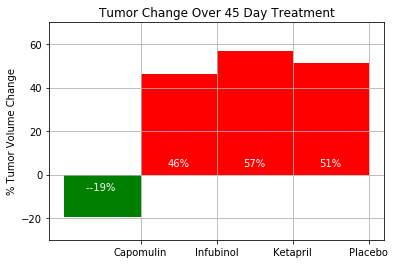